In [ ]:
%matplotlib inline
from keras.utils import plot_model
from keras.models import Model
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.optimizers import SGD , adam ,rmsprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
# np.random.seed(4)


In [ ]:
xls = pd.ExcelFile("/content/drive/My Drive/Colab Notebooks/Elearning-Data-cut.xls")
sheetX = xls.parse(0)
sheetX1 = xls.parse(1)
sheetX2 = xls.parse(2)


studentn = list(sheetX.loc[:,"STUDENTN"])
gender = list(sheetX.loc[:,"GENDER"])
age = list(sheetX.loc[:,"AGE"])
marry = list(sheetX.loc[:,"MARRY"])
faseleh = list(sheetX.loc[:,"FASELEH"])
beformea = list(sheetX.loc[:,"BEFORMEA"])
shaghel = list(sheetX.loc[:,"SHAGHEL"])
tehran = list(sheetX.loc[:,"TEHRAN"])
urben = list(sheetX.loc[:,"URBEN"])
shari = list(sheetX.loc[:,"SHARI"])
haz_me = list(sheetX.loc[:,"HAZ_ME"])
haz_fam = list(sheetX.loc[:,"HAZ_FAM"])
hazi_mf = list(sheetX.loc[:,"HAZI_MF"])
etminan = list(sheetX.loc[:,"ETMINAN"])
examana = list(sheetX.loc[:,"EXAMANA"])
locf = list(sheetX.loc[:,"LOCF"])
l_atunom = list(sheetX.loc[:,"L_ATUNOM"])
speedab = list(sheetX.loc[:,"SPEEDAB"])
laptop = list(sheetX.loc[:,"LAPTOP"])
mobile = list(sheetX.loc[:,"MOBILE"])
elhabit = list(sheetX.loc[:,"ELHABIT"])
first_sy =list(sheetX.loc[:,"FIRST.SY"])
satisfy = list(sheetX.loc[:,"SATSFIY"])
timenng = list(sheetX.loc[:,"TIMENNG"])
selfreg = list(sheetX.loc[:,"SELFREG"])
hozor = list(sheetX.loc[:,"HOZOR"])
elatiti = list(sheetX.loc[:,"ELATITI"])
st_busy = list(sheetX.loc[:,"ST_BUSY"])
kol = list(sheetX1.loc[:,"KOL.SY"])
out_in = list(sheetX2.loc[:,"OUT_IN"])

age[:] = [x / max(age) for x in age]
faseleh[:] = [x / max(faseleh) for x in faseleh]
beformea[:] = [x / max(beformea) for x in beformea]
haz_me[:] = [1.0 if x == 1 else 0.0  for x in haz_me]
etminan[:] = [x / max(etminan) for x in etminan]
examana[:] = [x / max(examana) for x in examana]
locf[:] = [x / max(locf) for x in locf]
l_atunom[:] = [x / max(l_atunom) for x in l_atunom]
elhabit[:] = [x / max(elhabit) for x in elhabit]
first_sy[:] = [x / max(first_sy) for x in first_sy]
satisfy[:] = [x / max(satisfy) for x in satisfy]
timenng[:] = [x / max(timenng) for x in timenng]
selfreg[:] = [x / max(selfreg) for x in selfreg]
hozor[:] = [x / max(hozor) for x in hozor]
elatiti[:] = [x / max(elatiti) for x in elatiti]
st_busy[:] = [x / max(st_busy) for x in st_busy]

data = np.array([gender , age , marry , faseleh , beformea ,shaghel ,tehran , urben , 
                 shari , haz_me , haz_fam , hazi_mf , etminan , examana , locf , 
                 l_atunom , speedab , laptop , mobile , elhabit , first_sy , satisfy ,
                 timenng , selfreg , hozor , elatiti , st_busy, kol ,out_in]).astype("float32")

# handling null values
for i in range(len(data)):
  for j in range(len(data[i])):
    if data[i][j] != data[i][j] :
      data[i][j]=np.nanmean(data[i])
data = data.T
print(data.shape)

# randomizing dataset
np.random.shuffle(data)
data2 = data.T
data3 = data2[:27]
data4 = data2[27:]
data3 = data3.T
data4 = data4.T

# 80 percent of the data will be for train
# 20 percent of the data will be for test
mid = int((8/10) * len(data))
train_x = data3[:mid]
test_x = data3[mid:]

print(train_x.shape , test_x.shape)

trainy=data4[:mid]
testy=data4[mid:]

trainy = trainy.T
testy = testy.T
train_y = trainy.tolist()
test_y = testy.tolist()
train_y[1] = to_categorical(train_y[1], 2)
test_y[1] = to_categorical(test_y[1], 2)
# print(train_y[1])

print(len(train_y[0]),len(test_y[0]))
print(len(train_y[1]),len(test_y[1]))
# print(test_y)

(740, 29)
(592, 27) (148, 27)
592 148
592 148


Model: "model_75"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_75 (InputLayer)           (None, 27)           0                                            
__________________________________________________________________________________________________
dense_425 (Dense)               (None, 100)          2800        input_75[0][0]                   
__________________________________________________________________________________________________
dropout_141 (Dropout)           (None, 100)          0           dense_425[0][0]                  
__________________________________________________________________________________________________
dense_426 (Dense)               (None, 100)          10100       dropout_141[0][0]                
___________________________________________________________________________________________

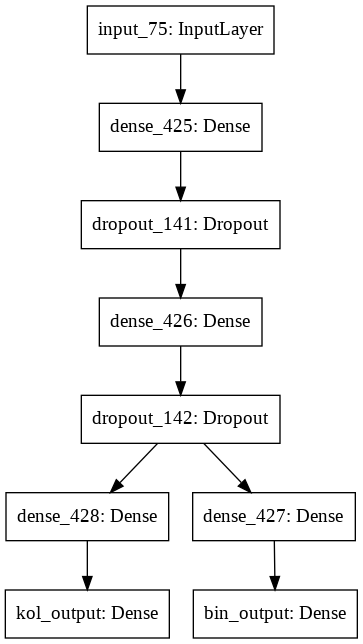

In [ ]:
#shared layers
visible = Input(shape=(27,))
hidden1 = Dense(units = 100 , activation="relu")(visible)
hidden1 = Dropout(0.2)(hidden1)
hidden2 = Dense(units = 100 , activation="relu")(hidden1)
hidden2 = Dropout(0.2)(hidden2)

#binary layers
out1 = Dense(units=100 ,activation="relu")(hidden2)
# out1 = Dropout(0.2)(out1)
bin_output = Dense(units=2 ,activation="softmax",name='bin_output')(out1)
#kol layer
out2 = Dense(units=100 ,activation="relu")(hidden2)
# out2 = Dropout(0.2)(out2)
kol_output = Dense(units=1 ,activation="linear" ,name='kol_output')(out2)

model = Model(inputs=visible, outputs=[kol_output ,bin_output])
model.compile(optimizer='adam',
              loss={'bin_output': 'hinge', 'kol_output': 'mean_absolute_error'},
              loss_weights={'kol_output': 1. , 'bin_output': 1.},
              metrics={'bin_output': 'accuracy', 'kol_output': 'mae'})
print(model.summary())
plot_model(model)

In [ ]:
history = model.fit(train_x, train_y,
          batch_size=20, epochs=200,
          verbose=1)

Epoch 1/200
592/592 [==============================] - 0s 593us/step - loss: 10.0143 - kol_output_loss: 9.1819 - bin_output_loss: 0.7637 - kol_output_mae: 9.2493 - bin_output_accuracy: 0.7939
Epoch 2/200
592/592 [==============================] - 0s 271us/step - loss: 3.1014 - kol_output_loss: 2.4271 - bin_output_loss: 0.6722 - kol_output_mae: 2.4291 - bin_output_accuracy: 0.8277
Epoch 3/200
592/592 [==============================] - 0s 274us/step - loss: 2.8290 - kol_output_loss: 2.1650 - bin_output_loss: 0.6722 - kol_output_mae: 2.1566 - bin_output_accuracy: 0.8277
Epoch 4/200
592/592 [==============================] - 0s 275us/step - loss: 2.7768 - kol_output_loss: 2.1147 - bin_output_loss: 0.6722 - kol_output_mae: 2.1045 - bin_output_accuracy: 0.8277
Epoch 5/200
592/592 [==============================] - 0s 277us/step - loss: 2.5743 - kol_output_loss: 1.8932 - bin_output_loss: 0.6722 - kol_output_mae: 1.9020 - bin_output_accuracy: 0.8277
Epoch 6/200
592/592 [=======================

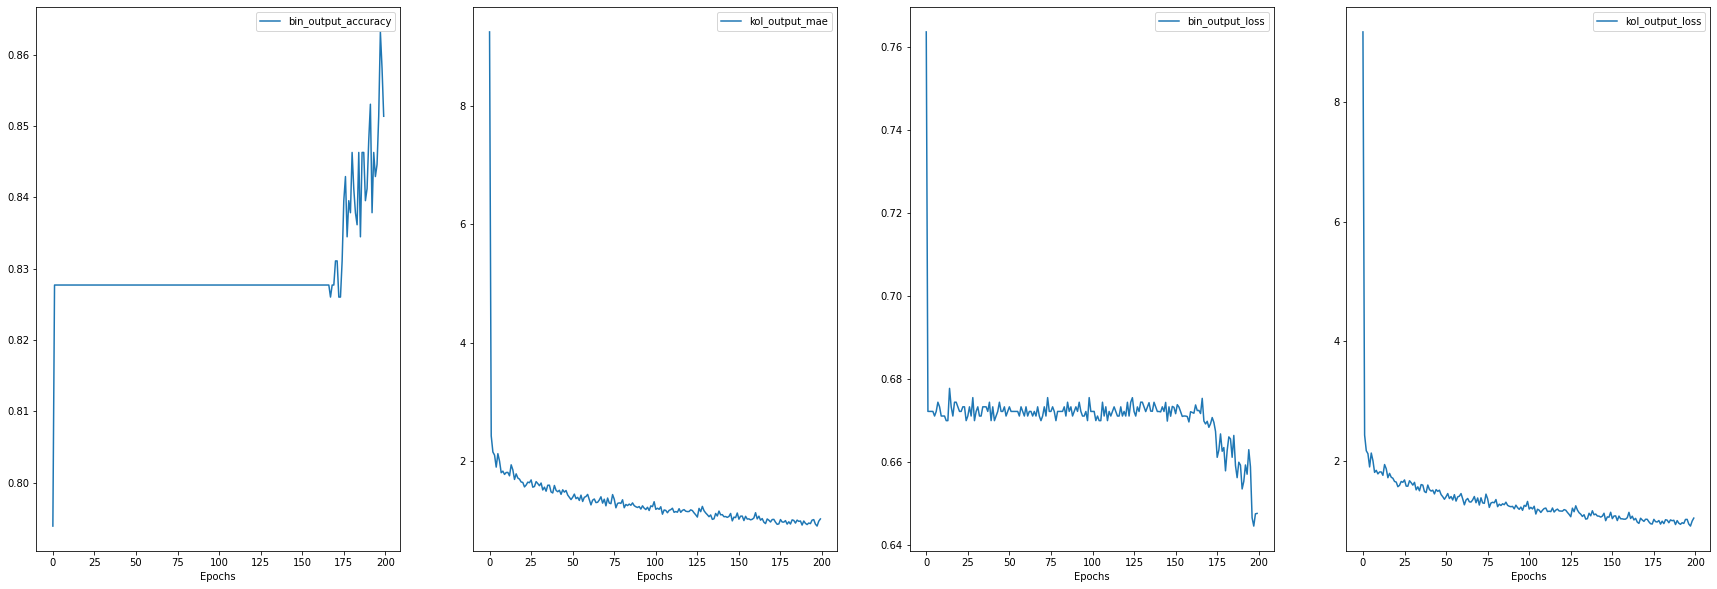

In [ ]:
# print(history.history)
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
axes[0].plot(history.history['bin_output_accuracy'], label='bin_output_accuracy')
axes[0].set_xlabel('Epochs')
axes[0].legend()

axes[1].plot(history.history['kol_output_mae'], label='kol_output_mae')
axes[1].set_xlabel('Epochs')
axes[1].legend()

axes[2].plot(history.history['bin_output_loss'], label='bin_output_loss')
axes[2].set_xlabel('Epochs')
axes[2].legend()  

axes[3].plot(history.history['kol_output_loss'], label='kol_output_loss')
axes[3].set_xlabel('Epochs')
axes[3].legend()


In [ ]:
score = model.evaluate(test_x, test_y)
print("kol_output_loss :",score[1])
print("bin_output_loss : ",score[2])
print("kol_output_mae : ",score[3])
print("bin_output_accuracy : ",score[4])

148/148 [==============================] - 0s 426us/step
kol_output_loss : 1.2964376211166382
bin_output_loss :  0.6151717305183411
kol_output_mae :  1.2884923219680786
bin_output_accuracy :  0.8918918967247009
